# Largest cluster as a function of network size

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import json
import glob

import scipy.stats as stats

In [2]:
sns.set()

In [3]:
data_root = '../data/largest-cluster/'
fig_root = "../figures/"
os.listdir(data_root)

['BA_NetworkPercolationExplosive_v7_N_800000_m_10_M_2_largest_cluster_near_tc_2019.12.7_2.26.30.txt',
 'BA_NetworkPercolationExplosive_v7_N_1200000_m_10_M_2_largest_cluster_near_tc_2019.12.7_3.46.35.txt',
 'BA_NetworkPercolationExplosive_v7_N_400000_m_10_M_2_largest_cluster_near_tc_2019.12.6_23.48.2.txt',
 'BA_NetworkPercolationExplosive_v7_N_1600000_m_10_M_2_largest_cluster_near_tc_2019.12.7_7.22.57.txt',
 'BA_NetworkPercolationExplosive_v7_N_1500000_m_10_M_2_largest_cluster_near_tc_2019.12.7_5.52.6.txt',
 'BA_NetworkPercolationExplosive_v7_N_1100000_m_10_M_2_largest_cluster_near_tc_2019.12.7_2.35.32.txt',
 'BA_NetworkPercolationExplosive_v7_N_1400000_m_10_M_2_largest_cluster_near_tc_2019.12.7_4.30.22.txt',
 'BA_NetworkPercolationExplosive_v7_N_900000_m_10_M_2_largest_cluster_near_tc_2019.12.7_0.20.20.txt',
 'BA_NetworkPercolationExplosive_v7_N_500000_m_10_M_2_largest_cluster_near_tc_2019.12.7_0.16.24.txt',
 'BA_NetworkPercolationExplosive_v7_N_1700000_m_10_M_2_largest_cluster_near_tc

In [4]:
signature = "BA_NetworkPercolationExplosive_v7_"
files = glob.glob(data_root + signature + "*_M_2_largest_cluster_near_tc*")

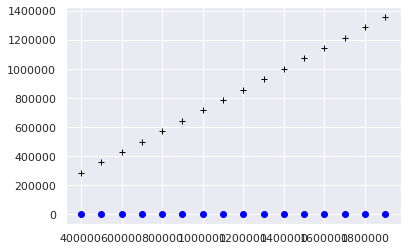

In [16]:
before = []
after  = []
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        N=int(head['N'])
#         t0=float(head['t0'])
        dt=float(head['dt'])
        pass
#     print(N)
#     print(t0)
#     print(dt)
    t, S_max = np.loadtxt(file, unpack=True)
    
    i = 0
    before.append([N, t[i], S_max[i]])
    i = -1
    after.append([N, t[i], S_max[i]])
    plt.plot(N, S_max[0], 'o', c='blue')
    plt.plot(N, S_max[-1], '+', c='black')

In [18]:
before = np.array(before)
after = np.array(after)

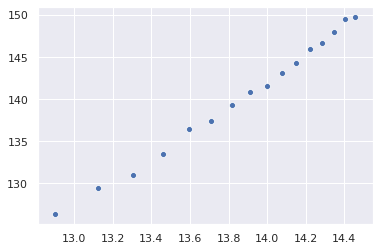

In [30]:
sns.scatterplot(np.log(before[:,0]), before[:,-1])
regress = stats.linregress(np.log(before[:,0]), before[:,-1])
print(regress)

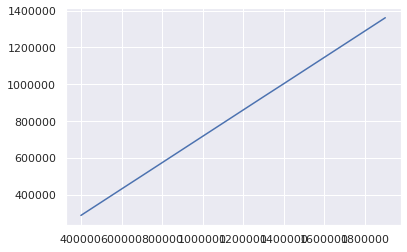

In [20]:
sns.lineplot(after[:,0], after[:,-1])

LinregressResult(slope=15.350459123215165, intercept=-72.54843884093626, rvalue=0.9974001451688378, pvalue=2.138038661523755e-17, stderr=0.29641147501629417)
../figures/BA_NetworkPercolationExplosive_v7__largest_cluster


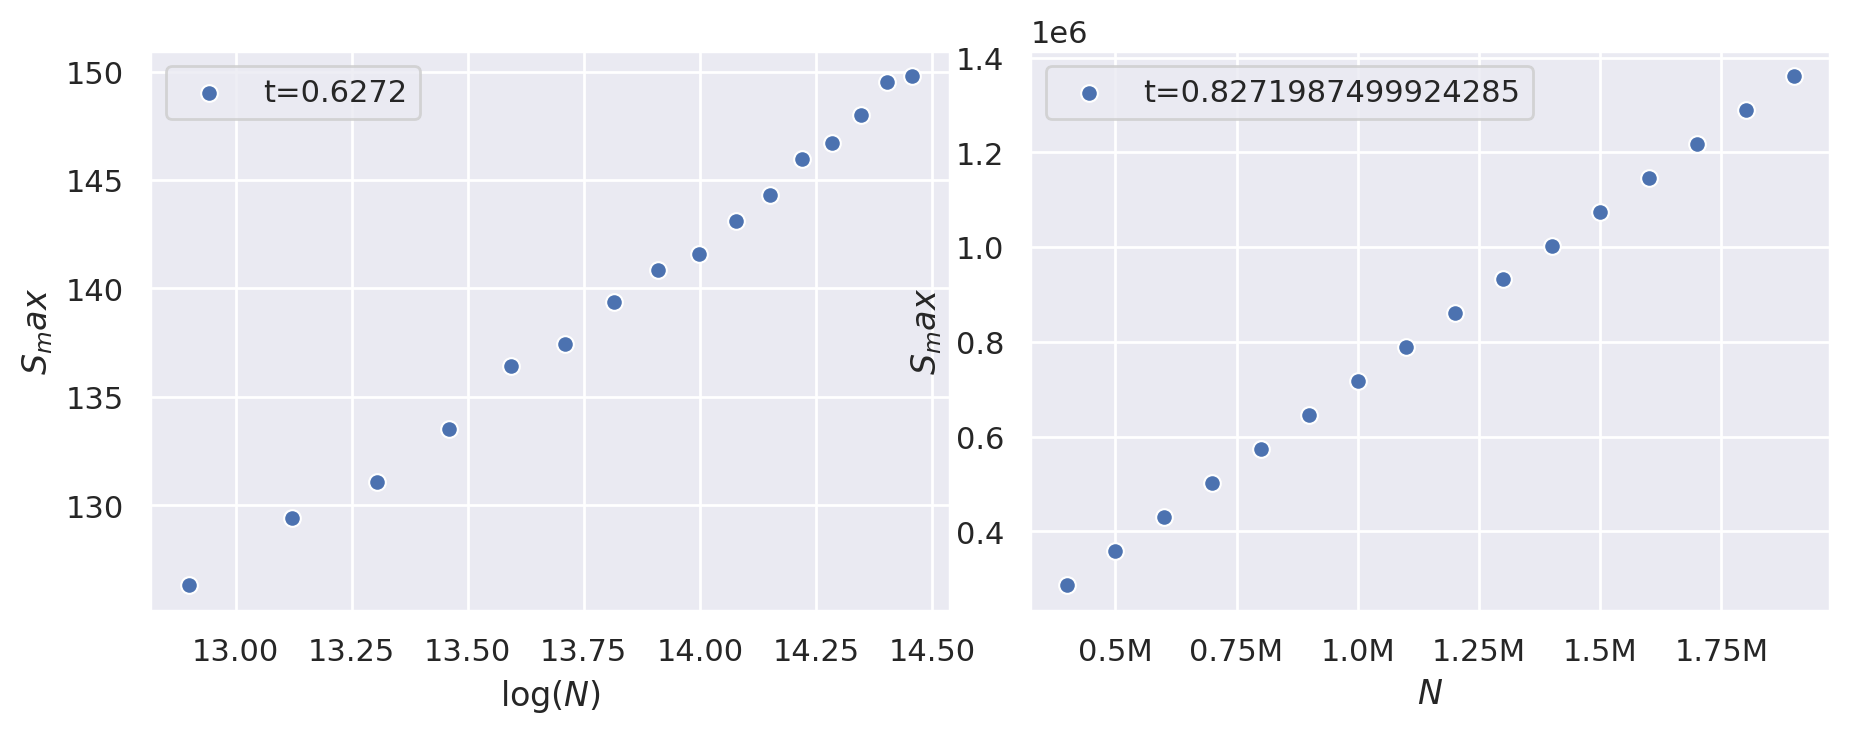

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5), dpi=200)

axs[0].set_xlabel(r"$\log(N)$")
axs[0].set_ylabel(r"$S_max$")

axs[0].set_position([0.08, 0.15, 0.4, 0.8])
axs[1].set_position([0.52, 0.15, 0.4, 0.8])

axs[1].set_xlabel(r"$N$")
axs[1].set_ylabel(r"$S_max$")

regress = stats.linregress(np.log(before[:,0]), before[:,-1])
print(regress)
sns.scatterplot(np.log(before[:,0]), before[:,-1], ax=axs[0], label='t={}'.format(before[0,1]))
last = sns.scatterplot(after[:,0], after[:,-1], ax=axs[1], label='t={}'.format(after[0,1]))

# last.set_xticklabels(last.get_xticklabels(), rotation=45)


xticks = axs[1].get_xticks()
xticks = ['{}M'.format(i/1000000) for i in xticks]
last.set_xticklabels(xticks)
last.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))


figname=fig_root + signature + "_largest_cluster"
print(figname)
plt.savefig(figname)

### Multiple line before and after

In [54]:
number = 12
data_to_plot = []
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        N=int(head['N'])
#         t0=float(head['t0'])
        dt=float(head['dt'])
        pass
#     print(N)
#     print(t0)
#     print(dt)
    t, S_max = np.loadtxt(file, unpack=True)
    
    
    indices = np.linspace(0, t.shape[0]-1, number, dtype=int)

    data_to_plot.append([N*np.ones(number), t[indices], S_max[indices]])


In [55]:
data_to_plot = np.array(data_to_plot)

In [45]:
data_to_plot.shape

(16, 3, 10)

In [46]:
data_to_plot[0,:,:]

array([[8.00000000e+05, 8.00000000e+05, 8.00000000e+05, 8.00000000e+05,
        8.00000000e+05, 8.00000000e+05, 8.00000000e+05, 8.00000000e+05,
        8.00000000e+05, 8.00000000e+05],
       [6.27200000e-01, 6.49421250e-01, 6.71643750e-01, 6.93866250e-01,
        7.16087500e-01, 7.38310000e-01, 7.60532500e-01, 7.82753750e-01,
        8.04976250e-01, 8.27198750e-01],
       [1.36422500e+02, 1.81395000e+02, 2.66391500e+02, 9.62966000e+02,
        2.18678150e+03, 4.24108135e+05, 4.88595981e+05, 5.26230172e+05,
        5.54501961e+05, 5.73454963e+05]])

In [24]:
Ns = data_to_plot[:,0,:] # network size
ts = data_to_plot[:,1,:] # relative link density
S_max_s = data_to_plot[:,2,:] # corresponding Largest cluster size

In [47]:
c = 0
data_to_plot[:,0,c]

array([ 800000., 1200000.,  400000., 1600000., 1500000., 1100000.,
       1400000.,  900000.,  500000., 1700000.,  700000.,  600000.,
       1900000., 1800000., 1000000., 1300000.])

In [52]:
data_to_plot[0,1,c]

0.6272

In [26]:
ts

array([[0.6272    , 0.82719875],
       [0.6272    , 0.82719917],
       [0.6272    , 0.8271975 ],
       [0.6272    , 0.82719937],
       [0.6272    , 0.82719933],
       [0.6272    , 0.82719909],
       [0.6272    , 0.82719929],
       [0.6272    , 0.82719889],
       [0.6272    , 0.827198  ],
       [0.6272    , 0.82719941],
       [0.6272    , 0.82719857],
       [0.6272    , 0.82719833],
       [0.6272    , 0.82719947],
       [0.6272    , 0.82719944],
       [0.6272    , 0.827199  ],
       [0.6272    , 0.82719923]])

In [27]:
S_max_s

array([[1.36422500e+02, 5.73454963e+05],
       [1.41608000e+02, 8.60168006e+05],
       [1.26323500e+02, 2.86874671e+05],
       [1.46706500e+02, 1.14626522e+06],
       [1.45944500e+02, 1.07463318e+06],
       [1.40836500e+02, 7.88469936e+05],
       [1.44292500e+02, 1.00298056e+06],
       [1.37435000e+02, 6.45123831e+05],
       [1.29395000e+02, 3.58564040e+05],
       [1.47992000e+02, 1.21791369e+06],
       [1.33525000e+02, 5.01752235e+05],
       [1.31050000e+02, 4.30291044e+05],
       [1.49790500e+02, 1.36119830e+06],
       [1.49498500e+02, 1.28953713e+06],
       [1.39357500e+02, 7.16811863e+05],
       [1.43087500e+02, 9.31835312e+05]])

4
../figures/BA_NetworkPercolationExplosive_v7__largest_cluster_multi


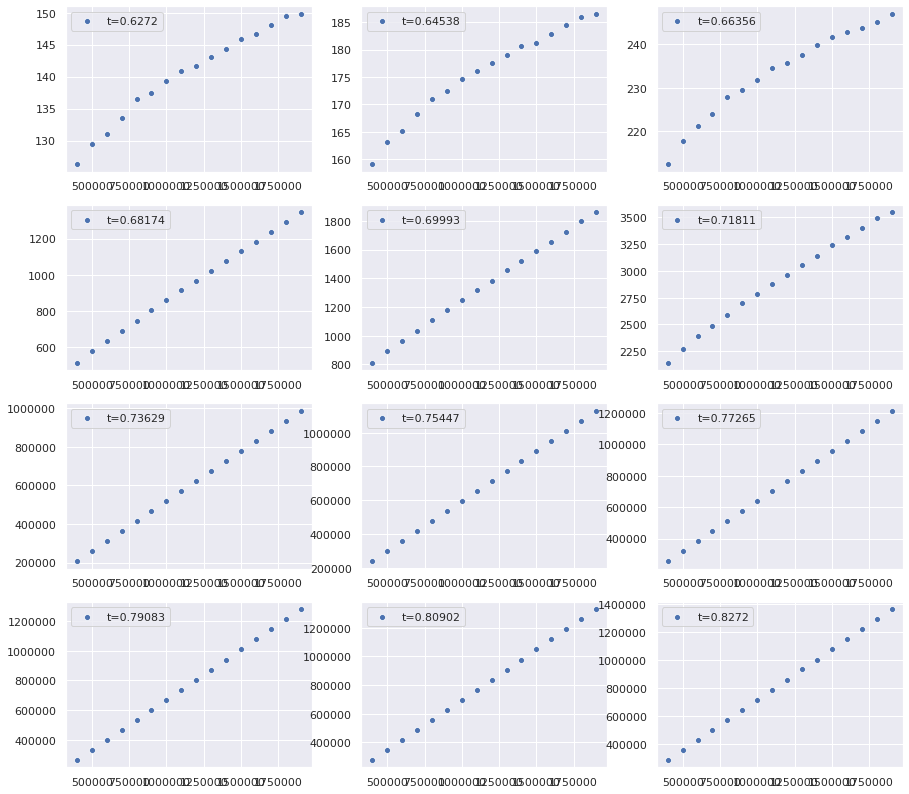

In [57]:

column = 3
row = int(number / column)

print(row)
fig, subs = plt.subplots(row, column , figsize=(column*5, 3.5*row))

c = 0
for axis in subs.flatten():
    if c >= data_to_plot.shape[-1]:
        continue
    t = data_to_plot[0,1,c]
    sns.scatterplot(ax=axis, x=data_to_plot[:,0,c], y=data_to_plot[:,2,c], label='t={:.5}'.format(t))
    c += 1
    pass


figname=fig_root + signature + "_largest_cluster_multi"
print(figname)
plt.savefig(figname)